In [2]:
%pylab inline

import pandas as pd
import numpy as np

# for calculating accurate distances betwen lat/long points
#from geopy.distance import vincenty

from calendar import monthrange
from datetime import datetime, date, timedelta

from sklearn.preprocessing import LabelEncoder, LabelBinarizer
#from itertools import chain

# from astral import Astral
from time import strftime
print strftime('%Y-%m-%d %X'), 'clock set'

from __future__ import division
import sklearn.metrics
import random

Populating the interactive namespace from numpy and matplotlib
2015-05-27 17:14:21 clock set


In [3]:
date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d")
train = pd.read_csv('../input/train.csv', parse_dates=['Date'], date_parser=date_parser)[['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']]


In [4]:
print train.shape
print train.dtypes

(10506, 12)
Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object


In [5]:
# how many had wnv?
positives = sum(train.ix[:,'WnvPresent'])
print positives, train.shape[0], positives / train.shape[0]

551 10506 0.0524462212069


In [6]:
# distinct values per column
for i in train.columns.values:
    print i, len(set(train.ix[:,i]))

Date 95
Address 138
Species 7
Block 64
Street 128
Trap 136
AddressNumberAndStreet 138
Latitude 138
Longitude 138
AddressAccuracy 4
NumMosquitos 50
WnvPresent 2


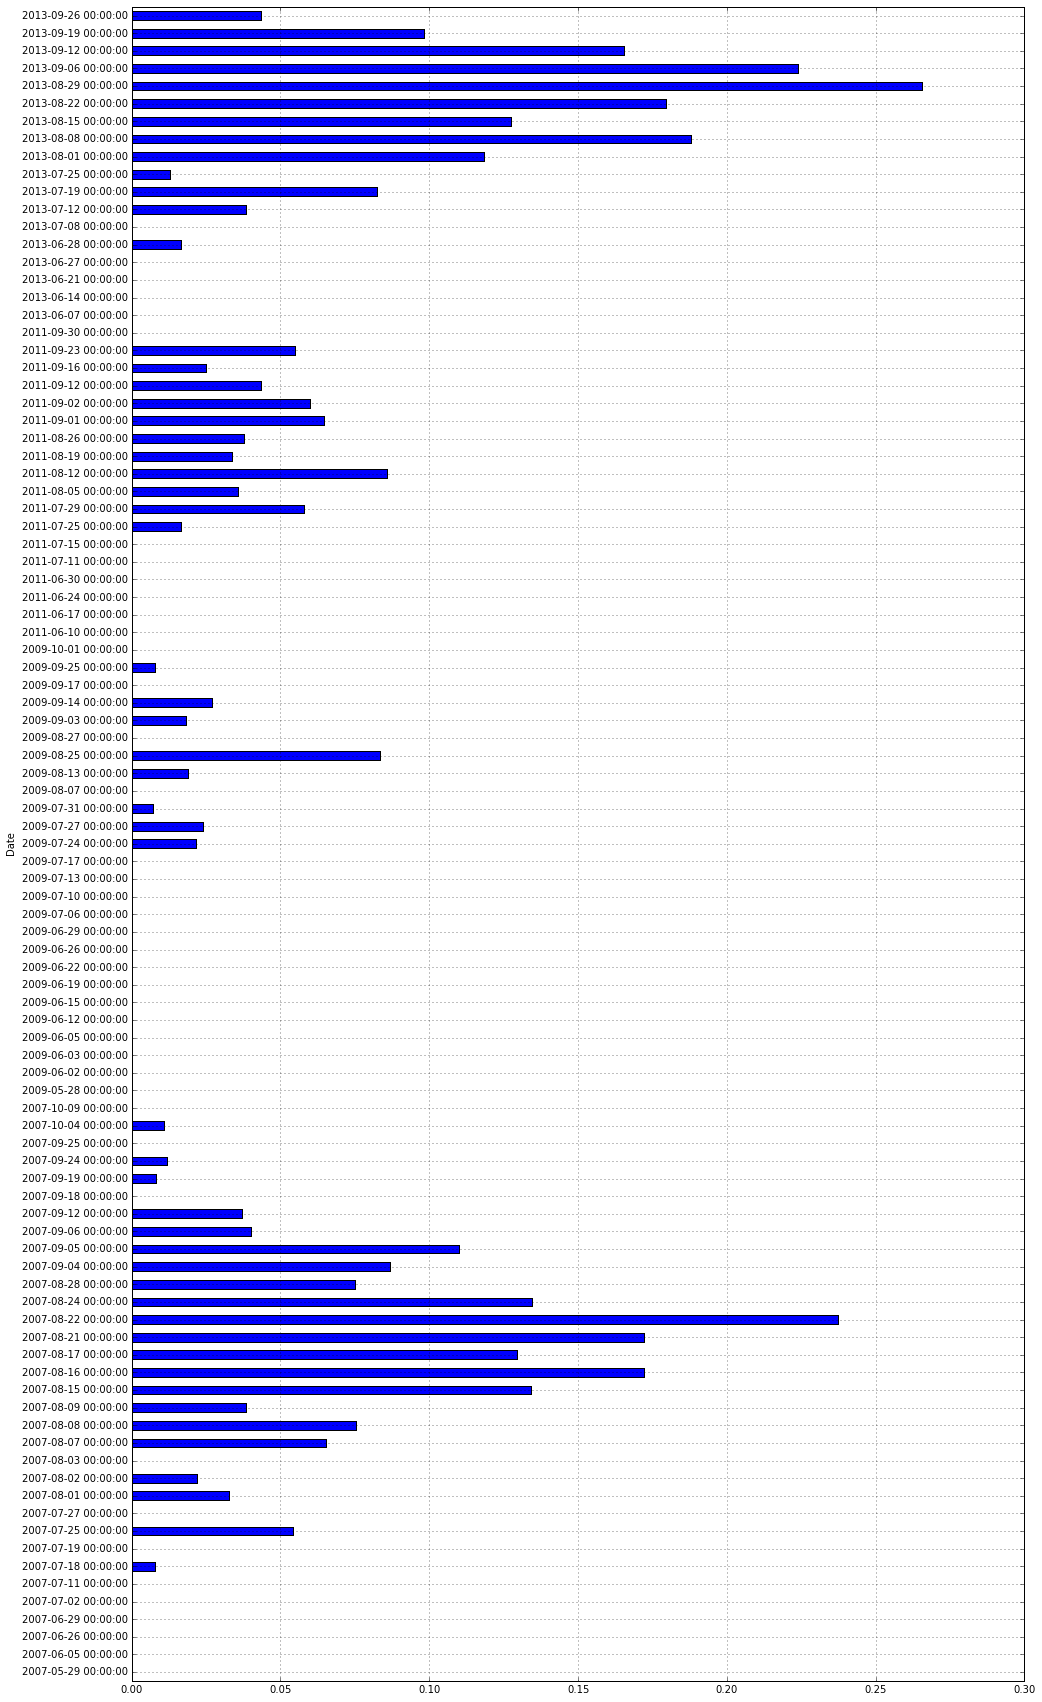

In [7]:
i = 0
byDate = train.groupby(train.columns[i])['WnvPresent'].mean()
byDate.plot(kind='barh', stacked=True, figsize=(16, 30))

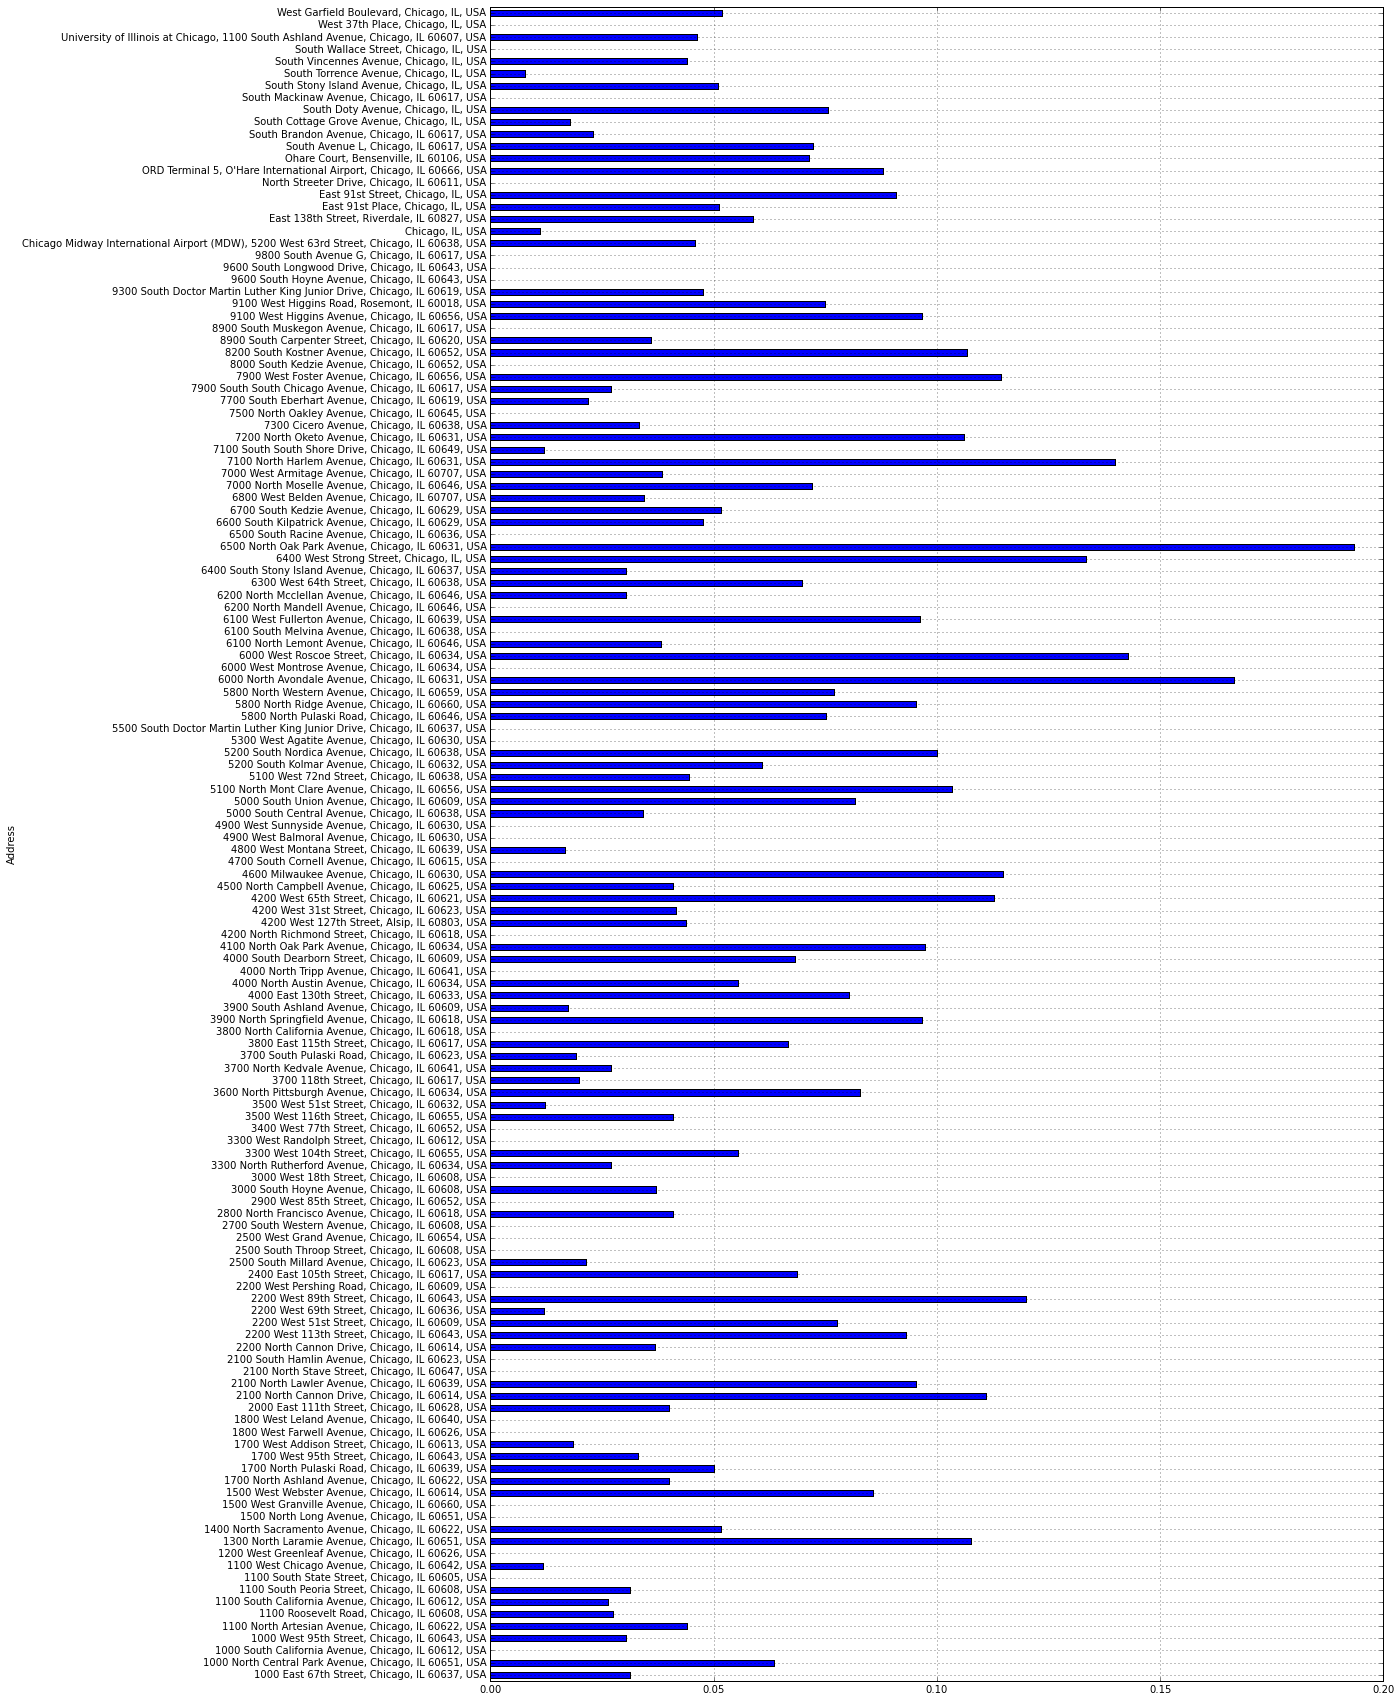

In [8]:
i = 1
byDate = train.groupby(train.columns[i])['WnvPresent'].mean()
byDate.plot(kind='barh', stacked=True, figsize=(16, 30))

                       NumMosquitos        WnvPresent     
                              count    sum      count  sum
Species                                                   
CULEX ERRATICUS                   1      7          1    0
CULEX PIPIENS                  2699  44671       2699  240
CULEX PIPIENS/RESTUANS         4752  66268       4752  262
CULEX RESTUANS                 2740  23431       2740   49
CULEX SALINARIUS                 86    145         86    0
CULEX TARSALIS                    6      7          6    0
CULEX TERRITANS                 222    510        222    0


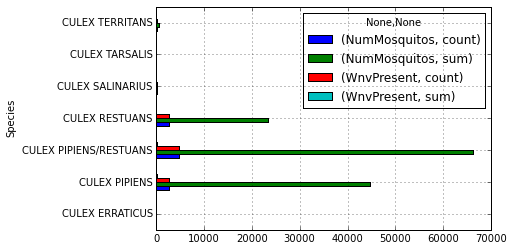

In [17]:
i = 2
bySpecies = train.groupby(train.columns[i])['NumMosquitos', 'WnvPresent'].agg(['count', 'sum'])
bySpecies.plot(kind='barh')
# bySpeciesTest = test.groupby(train.columns[i])['Species'].agg(['count'])
# bySpeciesTest.plot(kind='barh')
print bySpecies
# print bySpeciesTest

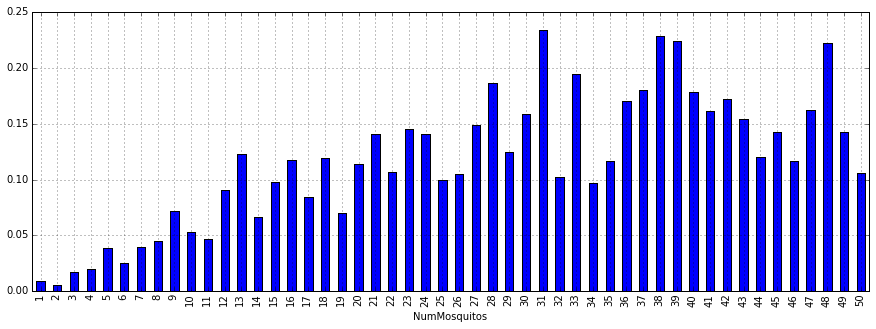

In [10]:
i = 10
byDate = train.groupby(train.columns[i])['WnvPresent'].mean()
byDate.plot(kind='bar', stacked=True, figsize=(15, 5))

In [11]:
# to do next, put in the given answers and calculate the area under the curve
# then fudge it up

In [12]:
test = pd.read_csv('../input/test.csv', parse_dates=['Date'], date_parser=date_parser)[['Date', 'Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy']]


In [146]:
test.shape

(116293, 10)

In [147]:
# distinct values per column
for i in test.columns.values:
    print i, len(set(train.ix[:,i]))

Date 95
Address 138
Species 7
Block 64
Street 128
Trap 136
AddressNumberAndStreet 138
Latitude 138
Longitude 138
AddressAccuracy 4


1.0
[ 0.  1.] [ 1.  1.] [1 0]


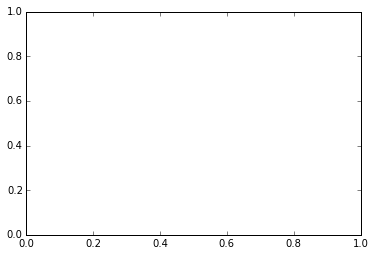

In [181]:
print sklearn.metrics.roc_auc_score(train.ix[:, 'WnvPresent'], train.ix[:, 'WnvPresent'])
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train.ix[:, 'WnvPresent'], train.ix[:, 'WnvPresent'])
print fpr, tpr, thresholds
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

0.5
[ 0.  1.] [ 0.  1.] [1 0]


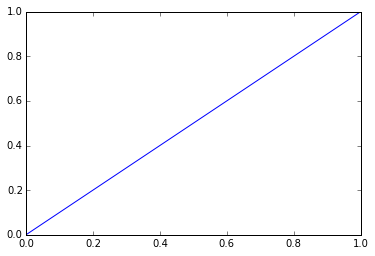

In [182]:
print sklearn.metrics.roc_auc_score(train.ix[:, 'WnvPresent'], [0] * 10506)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train.ix[:, 'WnvPresent'], [0] * 10506)
print fpr, tpr, thresholds
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

0.763150146622


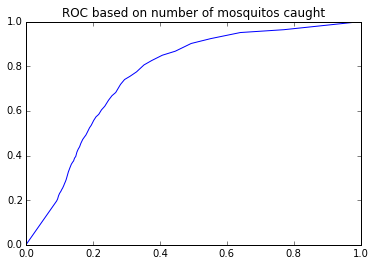

In [217]:
z = train.ix[:, 'NumMosquitos'] / 50
print sklearn.metrics.roc_auc_score(train.ix[:, 'WnvPresent'], z)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train.ix[:, 'WnvPresent'], z)
#print fpr, tpr, thresholds
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC based on number of mosquitos caught')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [235]:
train['Week'] = [i.week for i in train['Date']]

Week
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.001984
27      0.000000
28      0.007136
29      0.027073
30      0.027100
31      0.041096
32      0.087483
33      0.106965
34      0.158163
35      0.118908
36      0.122970
37      0.069549
38      0.031111
39      0.014957
40      0.008000
41      0.000000
Name: WnvPresent, dtype: float64


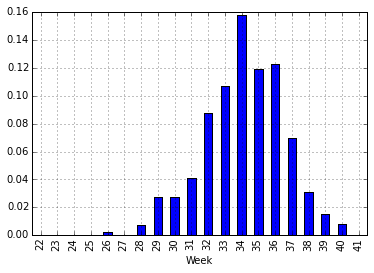

In [239]:
probaByWeek = train.groupby('Week')['WnvPresent'].mean()
probaByWeek.plot(kind='bar')
print probaByWeek

0.773130174715
[ 0.          0.06629834  0.10426921  0.14967353  0.22179809  0.28990457
  0.33962833  0.45916625  0.52486188  0.59698644  0.65474636  0.70105475
  0.72596685  0.82380713  0.87433451  1.        ] [ 0.          0.22504537  0.32123412  0.43194192  0.58802178  0.70598911
  0.77313975  0.86569873  0.90381125  0.94010889  0.96914701  0.98185118
  0.98548094  0.99818512  1.          1.        ] [ 1.15816327  0.15816327  0.12296984  0.11890838  0.10696517  0.08748318
  0.06954887  0.04109589  0.03111111  0.02710027  0.02707276  0.01495726
  0.008       0.00713558  0.00198413  0.        ]


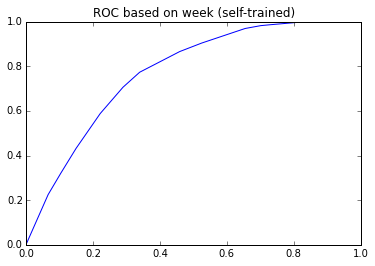

In [287]:
z = [probaByWeek[i.week] for i in train.ix[:, 'Date']]
print sklearn.metrics.roc_auc_score(train.ix[:, 'WnvPresent'], z)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train.ix[:, 'WnvPresent'], z)
print fpr, tpr, thresholds
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC based on week (self-trained)')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [260]:
with open('probaByWeek.csv', 'w') as f:
    f.write('Id,WnvPresent\n')
    for i in xrange(1, 116293 + 1):
        f.write(str(i) + ',' + str(probaByWeek[test.ix[i - 1, 'Week']]) + '\n')

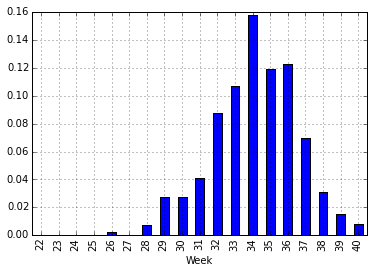

In [285]:
test.groupby('Week')['Week'].agg(lambda x: probaByWeek[int(mean(x))]).plot(kind='bar')